# Varios "Constructores" en una misma clase

## Ejemplo, clase Persona

Como se explicó previamente, en Python no existe la sobrecarga de funciones (varias funciones con el mismo nombre en el mismo espacio de trabajo). Pir lo tanto, esto significa que tampoco existe la sobrecarga de métodos (varios métodos con el mismo nombre en la misma clase) dado que los métodos, en escencian, son funciones.

Por lo anterior, no pueden definirsr varios constructores en la misma clase; porque sólo el último en definirse "existiría" y los anteriores serían "inexistentes" para Python:

In [ ]:
class Persona:
    def __init__(self, nombre):
        self.nombre = nombre
        self.edad = 18

    def __init__(self, nombre, edad):
        self.nombre = nombre
        self.edad = edad

P1 = Persona("Juan", 20)
print(P1.nombre, P1.edad)

# P2 = Persona("Pedro")
# print(P2.nombre, P2.edad)

En el código anterior, se define una clase que intenta tener dos constructores (métodos con el mismo nombre &lowbar;&lowbar;init&lowbar;&lowbar;). Lo cual provoca que el primer constructor sea "inexistente" para Python y que las líneas 13 y 14 marcara un error si se ejecutaran.

Una manera de solucionar esta situación es definir un único constructor que tenga una cantidad variable de argumentos:

In [ ]:
class Persona:
    def __init__(self, *args):
        if len(args) == 1:
            self.nombre = args[0]
            self.edad = 18
        else:
            self.nombre = args[0]
            self.edad = args[1]

P1 = Persona("Juan", 20)
print(P1.nombre, P1.edad)

P2 = Persona("Pedro")
print(P2.nombre, P2.edad)

## Ejemplo, clase CirculoP

Si se buscara definir en Python la clase que muestra el siguiente diagrama:
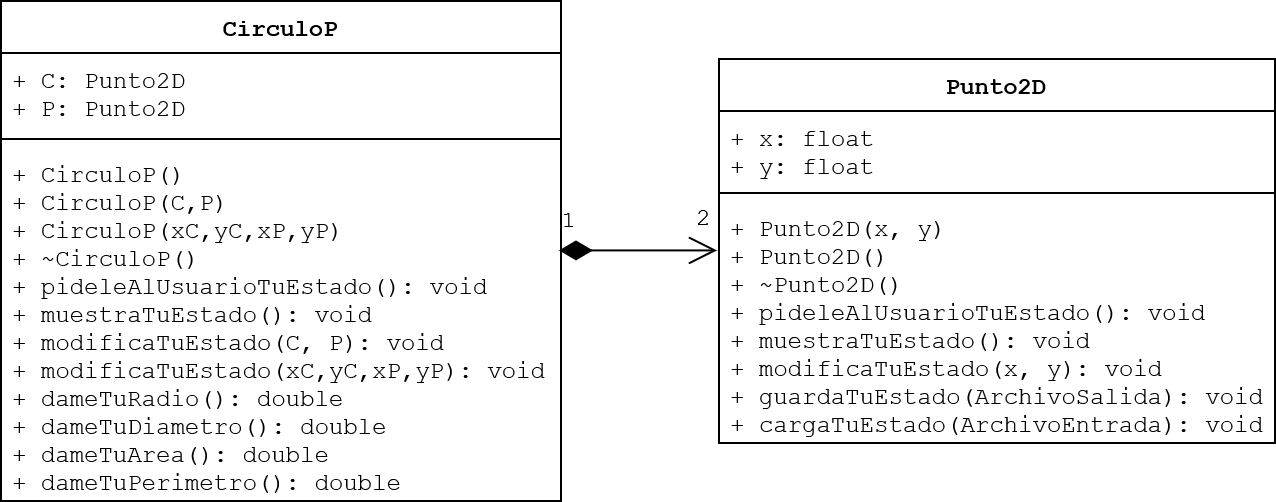

Además de necesitar previamente la clase Punto2D, el constructor tendría una cantidad variable de argumentos para permitir que se instancien objetos de las tres maneras que muestra el diagrama:

In [ ]:
from math import sqrt, pow, pi
class Punto2D:

    def __init__(self, x=0.0, y=0.0):
        self.x = float(x)
        self.y = float(y)

    def __del__(self):
        pass

    def __str__(self):
        return f'({self.x}, {self.y})'

    def pideleAlUsuarioTuEstado(self):
        self.x = float(input('Dame mi x '))
        self.y = float(input('Dame mi y '))

    def muestraTuEstado(self):
        print(self)

    def modificaTuEstado(self,x,y):
        self.x = float(x)
        self.y = float(y)

def calculaDistancia(A, B):
    if type(A) == type(B) and isinstance(A, Punto2D):
        return sqrt(pow(B.x - A.x, 2) + pow(B.y - A.y, 2))

class CirculoP:
    def __init__(self, *args) -> None:
        cantidad = len(args)
        if cantidad == 0:
            self.C = Punto2D()
            self.P = Punto2D()
        elif cantidad == 2:
            self.C = args[0]
            self.P = args[1]
        else:
            self.C = Punto2D(args[0], args[1])
            self.P = Punto2D(args[2], args[3])

    def __del__(self) -> None:
        pass

    def __str__(self) -> str:
        datos = f'C{self.C}\n'
        datos += f'P{self.P}\n'
        datos += f'Radio: {self.dameTuRadio()}\n'
        datos += f'Diámetro: {self.dameTuDiametro()}\n'
        datos += f'Área: {self.dameTuArea()}\n'
        datos += f'Perímetro: {self.dameTuPerimetro()}\n'
        return datos

    def pideleAlUsuarioTuEstado(self):
        print('Dame mi C')
        self.C.pideleAlUsuarioTuEstado()
        print('Dame mi P')
        self.P.pideleAlUsuarioTuEstado()

    def muestraTuEstado(self):
        print(self)

    def dameTuRadio(self):
        return calculaDistancia(self.C, self.P)

    def dameTuDiametro(self):
        return 2*self.dameTuRadio()

    def dameTuArea(self):
        return pi*self.dameTuRadio()**2

    def dameTuPerimetro(self):
        return 2*pi*self.dameTuRadio()

if __name__ == '__main__':

    Q1 = CirculoP()
    print(f'Q1\n{Q1}')

    A = Punto2D(1,1)
    B = Punto2D(2,2)
    Q2 = CirculoP(A, B)
    print(f'Q2')
    Q2.muestraTuEstado()

    Q3 = CirculoP(5.5, 6.6, 7.7, 8.8)
    print(f'Q3')
    Q3.muestraTuEstado()

    print(f'Q1')
    Q1.pideleAlUsuarioTuEstado()
    print(f'\nQ1\n{Q1}')

El programa anterior, en la línea 77, instancia un objeto CirculoP, sin enviar argumentos al constructor. El constructor de CirculoP, de la línea 32 a la 34, reconococe que no enviaron argumentos y construye dos puntos para su C y P, con los valores por omisión de la clase Puto2D.

En la línea 82, el programa instancia un objeto CirculoP, enviando como argumentos al constructor de CirculoP, los Puto2D que construyó en la 80 y 81. El constructor de CirculoP, de la línea 35 a la 37, reconococe que enviaron dos argumentos y asigna éstos a su C y P.

Por último, en la línea 86, el programa instancia un objeto CirculoP, enviando como argumentos al constructor de CirculoP, cuatro números con parte decimal. El constructor de CirculoP, de la línea 38 a la 40, lo reconococe y construye un Puto2D para su C, con los primeros dos valores que le llegaron, y construye otro Puto2D para su P, con los últimos dos valores que le llegaron.